# The goals of this file:
- to test the sorting of the input vectors (as a group) as a bound for the wasserstein distance for n vectors of dimension d

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Defining the Sorting function

In [2]:
def sort_vectors(vectors):
    
    # Get the indices that would sort the array lexicographically
    sorted_indices = np.lexsort(vectors.T[::-1])
    
    # Use these indices to sort the array
    sorted_vectors = vectors[sorted_indices]
    
    return sorted_vectors

# Example usage:
vectors = np.array([
    [3, 4],
    [1, 2],
    [3, 1],
    [2, 2],
    [1, 3]
])


sorted_vectors = sort_vectors(vectors)
print(sorted_vectors)


[[1 2]
 [1 3]
 [2 2]
 [3 1]
 [3 4]]


In [14]:
# Testing for d dimension
def generate_random_vectors(n, dims, start, end, dec=4,seed=None):
    if seed is not None:
        np.random.seed(seed)
    random_vectors = np.random.uniform(a, b, size=(n, d))
    rounded_vectors = np.around(random_vectors, decimals=decimals)
    return rounded_vectors

# Example usage:
n = 8  # Number of vectors
d = 3  # Number of dimensions
a = 0  # Lower bound of the range
b = 10  # Upper bound of the range
decimals = 3  # Number of decimal places
seed  =42
vectors = generate_random_vectors(n, dims =d, start =a, end = b, dec = decimals,seed = seed)
print(vectors)
print("----------------------------")
sorted_vectors = sort_vectors(vectors)
print(sorted_vectors)


[[3.745 9.507 7.32 ]
 [5.987 1.56  1.56 ]
 [0.581 8.662 6.011]
 [7.081 0.206 9.699]
 [8.324 2.123 1.818]
 [1.834 3.042 5.248]
 [4.319 2.912 6.119]
 [1.395 2.921 3.664]]
----------------------------
[[0.581 8.662 6.011]
 [1.395 2.921 3.664]
 [1.834 3.042 5.248]
 [3.745 9.507 7.32 ]
 [4.319 2.912 6.119]
 [5.987 1.56  1.56 ]
 [7.081 0.206 9.699]
 [8.324 2.123 1.818]]


## Defining the norm function

In [15]:
vector1 = np.array(
    [1,2]
)

vector2 = np.array(
    [4,2]
)
differences = vector1 - vector2  
result = np.linalg.norm(differences, axis=0)
print(result)

3.0


Sanity check: sorting  vector itself is better

In [16]:
vector1 = np.array(
    [1,2]
)

vector2 = np.array(
    [2,4]
)
differences = vector1 - vector2  
result = np.linalg.norm(differences, axis=0)
print(result)

2.23606797749979


Checking for randomly generated vectors of dim = 2, sorting them as a group

In [17]:

def compute_sum_of_norms(vectors1, vectors2):
    # Ensure both arrays have the same shape
    if vectors1.shape != vectors2.shape:
        raise ValueError("Both input lists must have the same shape.")

    differences = vectors1 - vectors2  
    norms = np.linalg.norm(differences, axis=1)
    res = np.sum(norms)
    
    return res


n = 8  # Number of vectors
d = 2  # Number of dimensions
a = 0  # Lower bound of the range
b = 10  # Upper bound of the range
decimals = 2  # Number of decimal places
seed  = 42
vec_list1 = generate_random_vectors(n, dims =d, start =a, end = b, dec = decimals,seed = seed)
seed  = 38
vec_list2 = generate_random_vectors(n, dims =d, start =a, end = b, dec = decimals,seed = seed)
vec_list1, vec_list2

(array([[3.75, 9.51],
        [7.32, 5.99],
        [1.56, 1.56],
        [0.58, 8.66],
        [6.01, 7.08],
        [0.21, 9.7 ],
        [8.32, 2.12],
        [1.82, 1.83]]),
 array([[3.85, 8.6 ],
        [9.44, 7.03],
        [6.34, 6.06],
        [2.  , 3.87],
        [2.59, 0.75],
        [2.81, 4.38],
        [4.83, 8.68],
        [5.3 , 5.62]]))

In [18]:
norm_not_sorted = compute_sum_of_norms(vectors1 = vec_list1, vectors2 = vec_list2)
norm_sorted = compute_sum_of_norms(vectors1 = sort_vectors(vec_list1), vectors2 = sort_vectors(vec_list2))
print(f"norm not sorted: {norm_not_sorted:.3f}, while norm sorted is: {norm_sorted:.3f}")

norm not sorted: 40.530, while norm sorted is: 33.417


Larger example

In [19]:
n = 50  # Number of vectors
d = 2  # Number of dimensions
a = 0  # Lower bound of the range
b = 10  # Upper bound of the range
decimals = 2  # Number of decimal places
seed  = 124
vec_list1 = generate_random_vectors(n, dims =d, start =a, end = b, dec = decimals,seed = seed)
seed  = 4
vec_list2 = generate_random_vectors(n, dims =d, start =a, end = b, dec = decimals,seed = seed)
norm_not_sorted = compute_sum_of_norms(vectors1 = vec_list1, vectors2 = vec_list2)
norm_sorted = compute_sum_of_norms(vectors1 = sort_vectors(vec_list1), vectors2 = sort_vectors(vec_list2))
print(f"norm not sorted: {norm_not_sorted:.3f}, while norm sorted is: {norm_sorted:.3f}")

norm not sorted: 264.297, while norm sorted is: 185.388


## Trying for many seeds and ploting

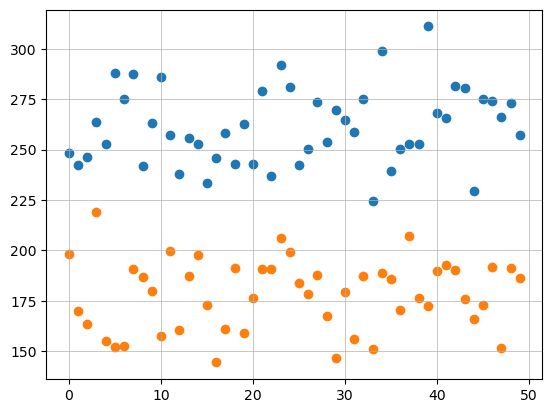

In [34]:
def lower_bound_sims(num = 50,n = 50 , d = 2,a = 0, b = 10,decimals = 2):
    sorted_outs = []
    not_sorted_outs = []
    for i in range(num):
        vec_list1 = generate_random_vectors(n, dims =d, start =a, end = b, dec = decimals)
        vec_list2 = generate_random_vectors(n, dims =d, start =a, end = b, dec = decimals)
        not_sorted_outs.append(compute_sum_of_norms(vectors1 = vec_list1, vectors2 = vec_list2))
        sorted_outs.append(compute_sum_of_norms(vectors1 = sort_vectors(vec_list1), vectors2 = sort_vectors(vec_list2)))

    return (np.array(not_sorted_outs),np.array(sorted_outs))


# Example use
num = 50
n = 50
d = 2
a = 0 
b = 10
decimals = 2
outs = lower_bound_sims(num = num,n = n , d = d,a = a, b = b,decimals = decimals)
sim_nums = np.arange(num)
plt.scatter(sim_nums,outs[0])
plt.scatter(sim_nums,outs[1])
plt.grid(True, linestyle='-', linewidth=0.5, alpha=1, which='both')
plt.show()

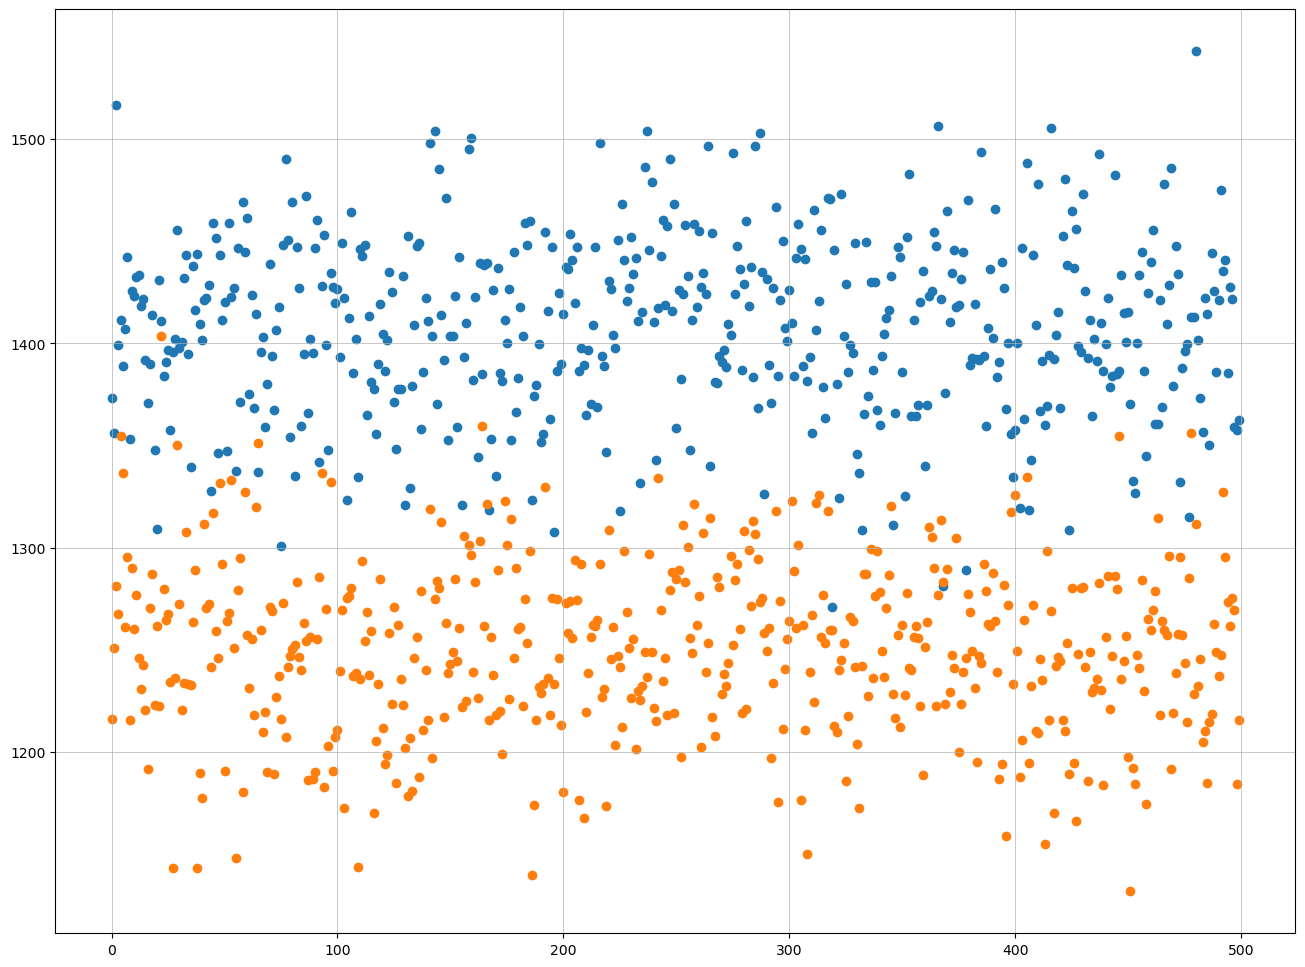

In [54]:
### A denser trial
num = 500
n = 80
d = 5
a = 0 
b = 20
decimals = 4
outs = lower_bound_sims(num = num,n = n , d = d,a = a, b = b,decimals = decimals)
sim_nums = np.arange(num)
plt.figure(figsize=(16,12))
plt.scatter(sim_nums,outs[0])
plt.scatter(sim_nums,outs[1])
plt.grid(True, linestyle='-', linewidth=0.5, alpha=1, which='both')
plt.show()

### A function to compute the  p =2 Wasserstein distance the naive way